<a href="https://colab.research.google.com/github/asjnhy/SMP-Prediction/blob/master/(200514)SMP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install dfply

     |████████████████████████████████| 614kB 2.8MB/s 


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from dfply import *

import warnings
warnings.filterwarnings(action='ignore') 

%matplotlib inline

plt.style.use('seaborn')
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
if not any([s=='result' for s in os.listdir()]): os.mkdir('result')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.chdir('/content/drive/My Drive/ECP/dataset')

In [0]:
target = pd.read_csv('target-with-weather.csv')
oil = pd.read_csv('mean_oilprice.csv')

In [0]:
date_range = target['date'].copy()
oilprice = pd.DataFrame(columns = ['date'])
oilprice['date']= date_range

In [0]:
oilprice = oilprice.merge(oil,how = 'outer')
oilprice = oilprice.drop(columns =['Unnamed: 0'])

In [0]:
oilprice.head()

,date,Price_Median,Price_Mean
0,2018-02-01,66.73,67.393333
1,2018-02-02,65.74,66.590000
2,2018-02-03,NaN,NaN
3,2018-02-04,NaN,NaN
4,2018-02-05,64.99,65.586667


In [0]:
target = target.merge(oilprice,how = 'outer').drop(columns = ['Unnamed: 0'])


In [0]:
target['Price_Mean'] = target['Price_Mean'].fillna(method = 'ffill')
target['Price_Median'] = target['Price_Median'].fillna(method = 'ffill')
target

,date,smp_max,smp_min,smp_mean,supply,year,month,day,dayofweek,temp_max,temp_min,temp_mean,Price_Median,Price_Mean
0,2018-02-01,150.65,116.84,132.71,87.47,2018,2,1,3,5.20,1.10,2.803846,66.73,67.393333
1,2018-02-02,163.86,116.84,134.19,86.64,2018,2,2,4,4.40,-0.10,1.923077,65.74,66.590000
2,2018-02-03,164.07,116.85,131.39,88.28,2018,2,3,5,2.00,-2.05,-0.363462,65.74,66.590000
3,2018-02-04,171.00,115.76,131.89,86.14,2018,2,4,6,-1.50,-3.20,-2.376923,65.74,66.590000
4,2018-02-05,170.34,123.89,137.96,90.63,2018,2,5,0,0.20,-3.00,-1.605769,64.99,65.586667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2020-01-27,154.46,78.95,94.07,76.64,2020,1,27,0,9.65,6.70,8.388462,59.32,58.943333
726,2020-01-28,156.57,84.80,103.05,80.25,2020,1,28,1,9.80,6.95,8.025000,59.51,59.110000
727,2020-01-29,154.78,86.99,109.21,82.90,2020,1,29,2,9.15,6.15,7.398077,59.81,59.170000
728,2020-01-30,203.15,84.87,112.85,84.85,2020,1,30,3,7.55,5.30,6.317308,58.29,58.200000


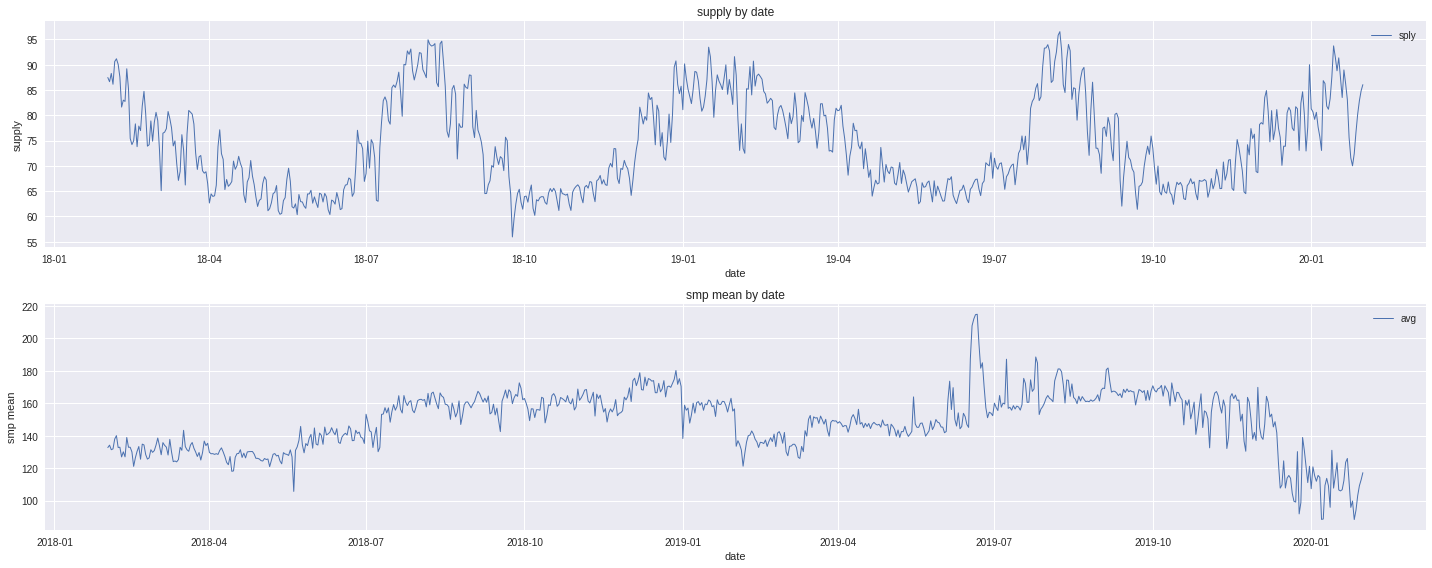

In [0]:
# 일별 SMP 시각화
fig, axes = plt.subplots(2,1,figsize=(20,8))
#plt.ylim(40, 110)
target['date'] = pd.to_datetime(target['date'])
axes[0].plot(target['date'], target['supply'], label='sply', lw=1)


axes[1].plot(target['date'], target['smp_mean'], label='avg', lw=1)

axes[0].set_xlabel('date')
axes[0].set_ylabel('supply')
axes[0].set_title('supply by date')
axes[0].xaxis.set_minor_locator(md.MonthLocator())
axes[0].xaxis.set_major_formatter(md.DateFormatter('%y-%m'))
axes[0].legend()

axes[1].set_xlabel('date')
axes[1].set_ylabel('smp mean')
axes[1].set_title('smp mean by date')
axes[1].xaxis.set_minor_locator(md.MonthLocator())
# axes[1].xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
axes[1].legend()

plt.tight_layout()
plt.show()

In [0]:
# x_train = target.loc[:, ['supply', 'year', 'month', 'day', 'dayofweek', 'temp_max', 'temp_min', 'temp_mean','Price_Mean','Price_Median']]
# y_train = target.loc[:, ['smp_min', 'smp_max', 'smp_mean' ]]


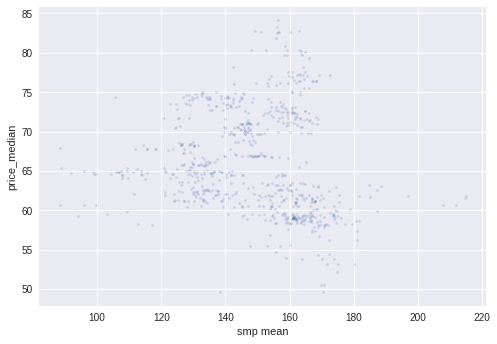

In [0]:
plt.scatter(target['smp_mean'], target['Price_Median'], s=5, alpha=0.2)
plt.xlabel('smp mean')
plt.ylabel('price_median')
plt.show()


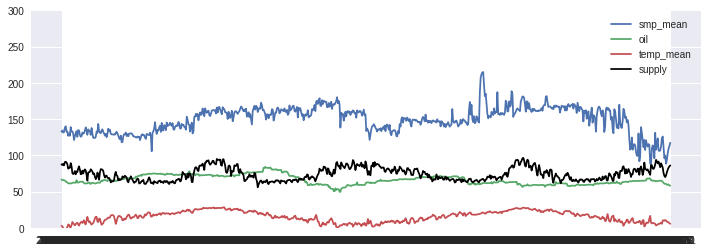

In [0]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(target.loc[:, 'date'], target.loc[:, 'smp_mean'], label='smp_mean')
plt.plot(target.loc[:, 'date'], target.loc[:, 'Price_Median'], label='oil')
plt.plot(target.loc[:, 'date'], target.loc[:, 'temp_mean'], label='temp_mean')
plt.plot(target.loc[:, 'date'], target.loc[:, 'supply'], label='supply', color='black')
plt.ylim(0,300)
plt.legend()
plt.show()

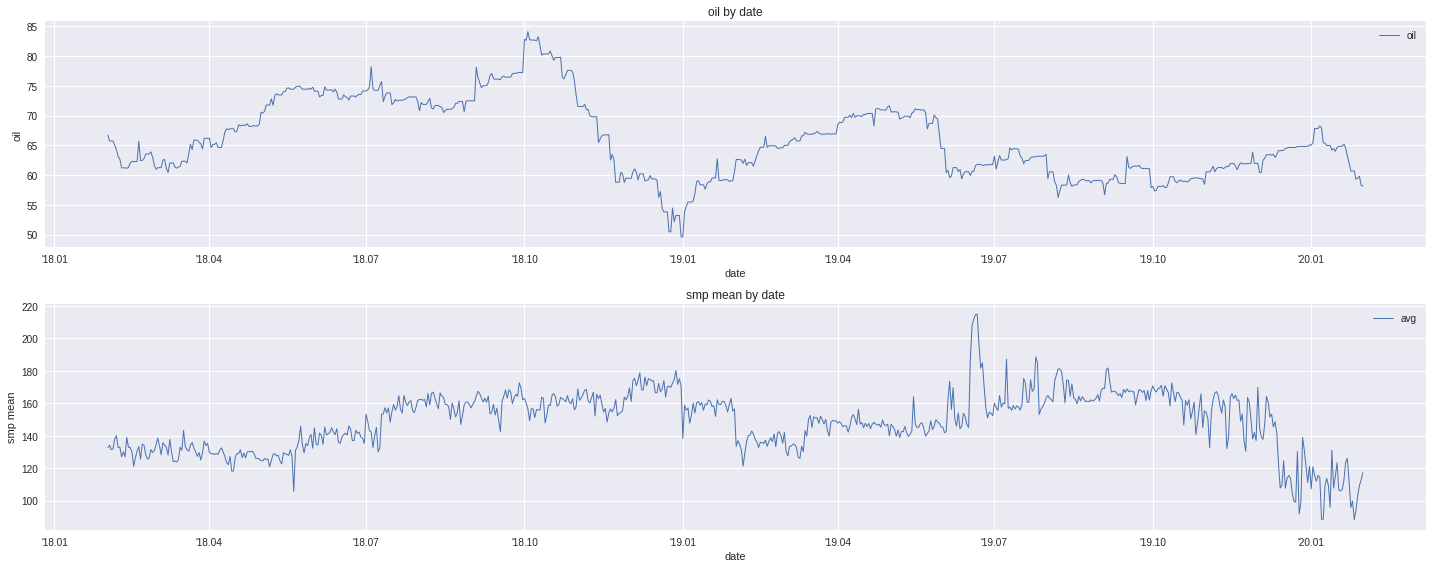

In [0]:
# 일별 SMP 시각화
fig, axes = plt.subplots(2,1,figsize=(20,8))
#plt.ylim(40, 110)

axes[0].plot(target.loc[:, 'date'], target.loc[:, 'Price_Median'], label='oil', lw=1)


axes[1].plot(target['date'], target['smp_mean'], label='avg', lw=1)

axes[0].set_xlabel('date')
axes[0].set_ylabel('oil')
axes[0].set_title('oil by date')
axes[0].xaxis.set_minor_locator(md.MonthLocator())
axes[0].xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))

axes[0].legend()

axes[1].set_xlabel('date')
axes[1].set_ylabel('smp mean')
axes[1].set_title('smp mean by date')
axes[1].xaxis.set_minor_locator(md.MonthLocator())
axes[1].xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
axes[1].legend()

plt.tight_layout()
plt.show()